# FMO Complex Model Examples

### Mean Field calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qclab import Simulation # import simulation class 
from qclab.models import FMOComplex # import model class 
from qclab.algorithms import MeanField # import algorithm class 
from qclab.dynamics import serial_driver # import dynamics driver


100%|██████████| 3001/3001 [00:02<00:00, 1165.16it/s]


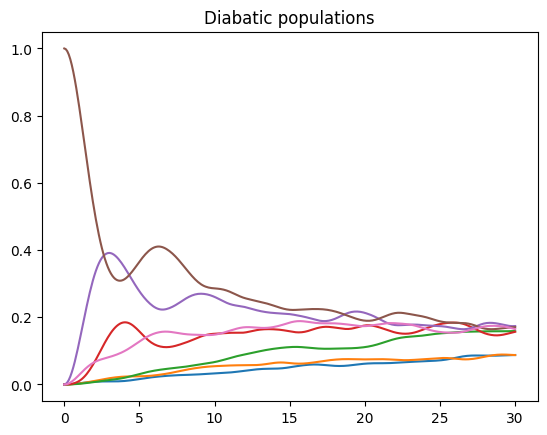

In [2]:

sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt_update = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "mass": 1,
    "l_reorg": 35 / 208.521, # reorganization energy
    "w_c": 106.14 / 208.521, # characteristic frequency
    "N": 200,
})
sim.algorithm = MeanField()

sim.initial_state["wf_db"]= np.zeros(7, dtype=complex)
sim.initial_state["wf_db"][5] += 1.0

data = serial_driver(sim)

t = data.data_dict["t"]
plt.plot(t, np.real(np.einsum("tii->ti",data.data_dict["dm_db"])))
plt.title("Diabatic populations")
plt.show()

### Surface Hopping Calculations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qclab import Simulation # import simulation class 
from qclab.models import FMOComplex # import model class 
from qclab.algorithms import FewestSwitchesSurfaceHopping # import algorithm class 
from qclab.dynamics import serial_driver # import dynamics driver

#### Stochastic sampling

100%|██████████| 3001/3001 [00:03<00:00, 783.14it/s]


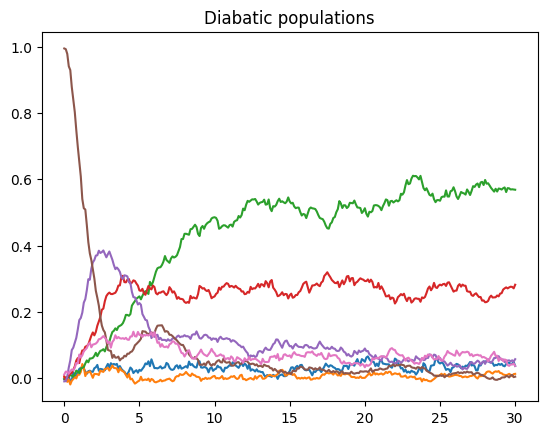

In [4]:
sim = Simulation()

sim.settings.num_trajs = 200
sim.settings.batch_size = 50
sim.settings.tmax = 30
sim.settings.dt_update = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "mass": 1,
    "l_reorg": 35 / 208.521, # reorganization energy
    "w_c": 106.14 / 208.521, # characteristic frequency
    "N": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    "fssh_deterministic":False,
    "gauge_fixing":'sign_overlap'
})

sim.initial_state["wf_db"]= np.zeros(7, dtype=complex)
sim.initial_state["wf_db"][5] += 1.0

data = serial_driver(sim)

t = data.data_dict["t"]
plt.plot(t, np.real(np.einsum("tii->ti",data.data_dict["dm_db"])))
plt.title("Diabatic populations")
plt.show()

#### Deterministic sampling

To use deterministic sampling we multiply the number of trajectories and batch size by the number of states. Note that the convergence behavior changes.

100%|██████████| 3001/3001 [00:02<00:00, 1070.96it/s]


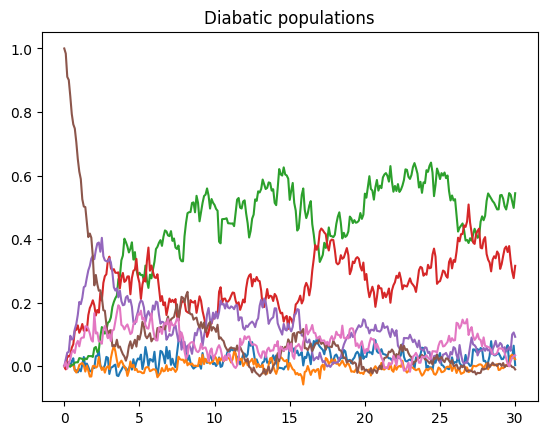

In [5]:
sim = Simulation()

sim.settings.num_trajs = 20*7
sim.settings.batch_size = 5*7
sim.settings.tmax = 30
sim.settings.dt_update = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "mass": 1,
    "l_reorg": 35 / 208.521, # reorganization energy
    "w_c": 106.14 / 208.521, # characteristic frequency
    "N": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    "fssh_deterministic":True,
    "gauge_fixing":'sign_overlap'
})

sim.initial_state["wf_db"] = np.zeros(7, dtype=complex)
sim.initial_state["wf_db"][5] += 1.0

data = serial_driver(sim)

t = data.data_dict["t"]
plt.plot(t, np.real(np.einsum("tii->ti",data.data_dict["dm_db"])))
plt.title("Diabatic populations")
plt.show()

### Using a parllel driver

w_ce will parallelize the above deterministic surface hopping calculation over four tasks.

100%|██████████| 3001/3001 [00:05<00:00, 592.44it/s]


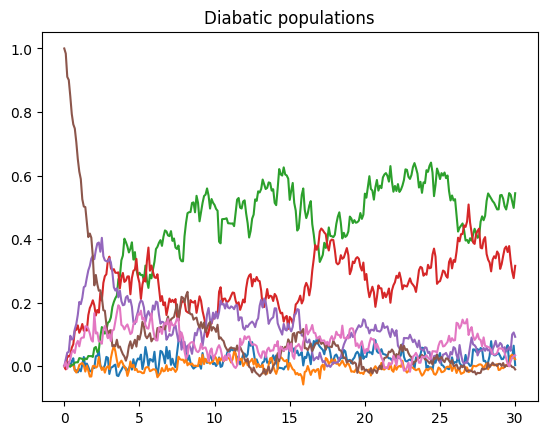

In [6]:
from qclab.dynamics import parallel_driver_multiprocessing # import dynamics driver

sim = Simulation()

sim.settings.num_trajs = 20*7
sim.settings.batch_size = 5*7
sim.settings.tmax = 30
sim.settings.dt_update = 0.01

sim.model = FMOComplex({
    "kBT": 1,
    "mass": 1,
    "l_reorg": 35 / 208.521, # reorganization energy
    "w_c": 106.14 / 208.521, # characteristic frequency
    "N": 200,
})
sim.algorithm = FewestSwitchesSurfaceHopping({
    "fssh_deterministic":True,
    "gauge_fixing":'sign_overlap'
})

sim.initial_state["wf_db"] = np.zeros(7, dtype=complex)
sim.initial_state["wf_db"][5] += 1.0

data = parallel_driver_multiprocessing(sim)

t = data.data_dict["t"]
plt.plot(t, np.real(np.einsum("tii->ti",data.data_dict["dm_db"])))
plt.title("Diabatic populations")
plt.show()